<a href="https://colab.research.google.com/github/charlieskc/MachineLearning/blob/master/HK_Covid19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hong Kong COVID-19 Analysis (based on age group)

Data downloaded from: http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv

There are many statistics about COVID-19 in Hong Kong however there are not much statistic based on age group. This notebook aims to provide COVID-10 mortality statistics based on age group.



In [1]:
#dataset refresh everyday from the website
!rm enhanced_sur_covid_19_eng.csv*
!wget http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv
#!wget http://www.chp.gov.hk/files/misc/latest_situation_of_reported_cases_covid_19_eng.csv
!ls -lh
!wc -l enhanced_sur_covid_19_eng.csv

rm: cannot remove 'enhanced_sur_covid_19_eng.csv*': No such file or directory
--2020-08-11 03:11:03--  http://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv
Resolving www.chp.gov.hk (www.chp.gov.hk)... 104.19.253.59, 104.19.254.59, 2606:4700::6813:fd3b, ...
Connecting to www.chp.gov.hk (www.chp.gov.hk)|104.19.253.59|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv [following]
--2020-08-11 03:11:03--  https://www.chp.gov.hk/files/misc/enhanced_sur_covid_19_eng.csv
Connecting to www.chp.gov.hk (www.chp.gov.hk)|104.19.253.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘enhanced_sur_covid_19_eng.csv’

enhanced_sur_covid_     [ <=>                ] 377.62K  --.-KB/s    in 0.04s   

2020-08-11 03:11:04 (9.94 MB/s) - ‘enhanced_sur_covid_19_eng.csv’ saved [386686]

total 388K
drwx------ 4 root root 4.0K Aug 11 03:10 dr

# Import Packages

In [2]:
'''
Normally you do not need to install pandas, uncomment if pandas is missing
'''
#install pandas 
#!pip install pandas

#load packages
import sys 
import pandas as pd 
import matplotlib 
import numpy as np 
import scipy as sp 
import IPython
import datetime
from IPython.display import display

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Data Files

##Age group engineering:
1. Age is categorized into age_bins. Grouping based on WHO https://www.who.int/healthinfo/paper31.pdf?ua=1


In [3]:
df = pd.read_csv('/content/enhanced_sur_covid_19_eng.csv')
df['Report date'] =  pd.to_datetime(df['Report date'], format='%d/%m/%Y')

#df1 = pd.read_csv('/content/latest_situation_of_reported_cases_covid_19_eng.csv')

#categorize age into age group. age group based on WHO https://www.who.int/healthinfo/paper31.pdf?ua=1
ageBin= [0,4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79,84,89,94,99,104]
df['age_bins'] = pd.cut(x=df['Age'], bins=ageBin)

#preview data
df.sample(5) 

#print(df.dtypes)

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable,age_bins
3545,3546,2020-08-03,31/07/2020,M,60,NaN,Hospitalised,HK Resident,Epidemiologically linked with local case,Confirmed,"(59, 64]"
4123,4124,2020-08-10,02/08/2020,F,24,NaN,To be provided,HK Resident,Epidemiologically linked with local case,Confirmed,"(19, 24]"
2772,2773,2020-07-27,22/07/2020,F,42,NaN,Discharged,HK Resident,Local case,Confirmed,"(39, 44]"
3464,3465,2020-08-02,29/07/2020,F,61,NaN,Hospitalised,HK Resident,Local case,Confirmed,"(59, 64]"
519,520,2020-03-28,19/03/2020,F,35,NaN,Discharged,HK resident,Imported case,Confirmed,"(34, 39]"


# Data Description

In [4]:
df.describe(include = 'all')


,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable,age_bins
count,4149.000000,4149,4149,4149,4149.000000,0.0,4149,4149,4149,4149,4139
unique,NaN,162,159,2,NaN,NaN,6,5,6,2,21
top,NaN,2020-07-30 00:00:00,Asymptomatic,F,NaN,NaN,Discharged,HK Resident,Epidemiologically linked with local case,Confirmed,"(54, 59]"
freq,NaN,149,881,2086,NaN,NaN,2917,2658,1762,4148,370
first,NaN,2020-01-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2020-08-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2075.000000,NaN,NaN,NaN,43.966257,NaN,NaN,NaN,NaN,NaN,NaN
std,1197.857462,NaN,NaN,NaN,20.328351,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1038.000000,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN


#Statistics - Gender

[Text(0, 0.5, 'No. of infections')]

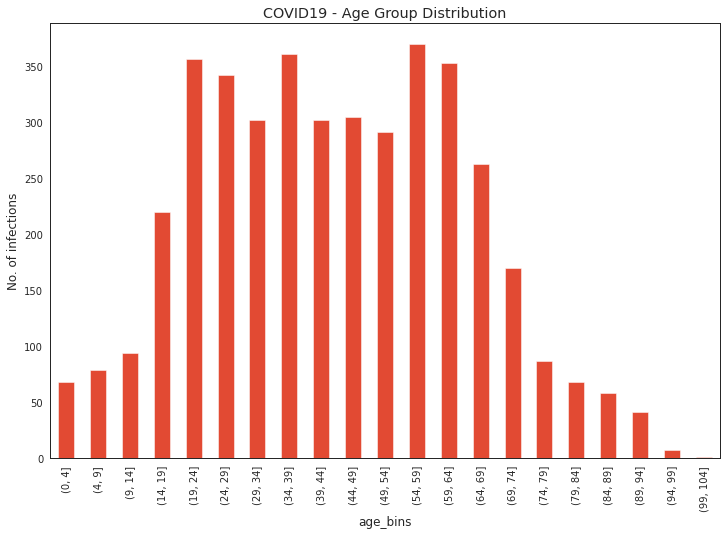

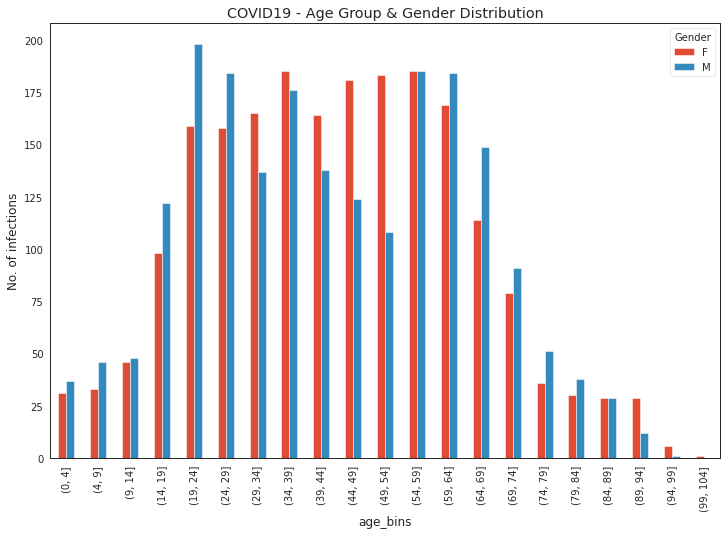

In [5]:
ax1 = df.groupby(['age_bins']).size().plot(title='COVID19 - Age Group Distribution', kind='bar')
ax1.set(ylabel='No. of infections')

#df.groupby(['Hospitalised/Discharged/Deceased']).size().plot(title='COVID19 Gender Distribution', kind='bar')
#df.groupby(['Gender']).size().plot(title='COVID19 Gender Distribution', kind='bar')


ax2 = pd.crosstab(df['age_bins'],df['Gender']).plot(title='COVID19 - Age Group & Gender Distribution', kind='bar')
ax2.set(ylabel='No. of infections')

#pd.crosstab(df['Gender'],df['Hospitalised/Discharged/Deceased']).plot.bar()


# Statistic - Mortality


[Text(0, 0.5, 'Mortality Rate')]

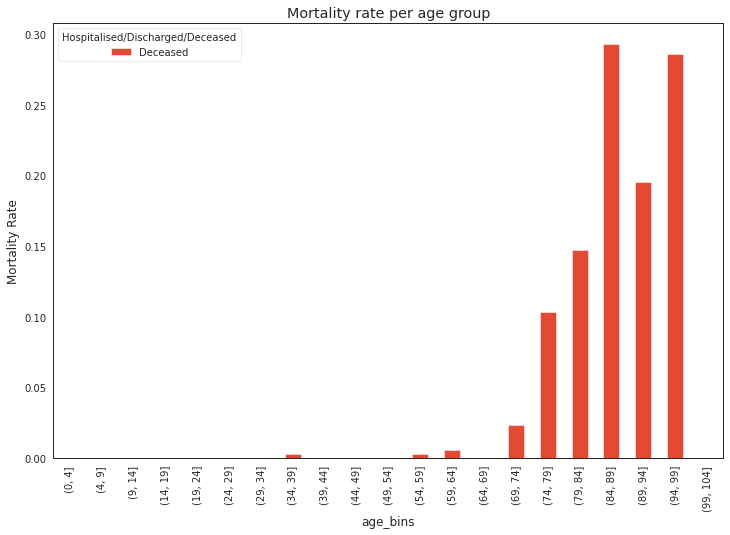

In [6]:
#No. of deceased per Age group
df_deceased = df[df['Hospitalised/Discharged/Deceased']=='Deceased']

m_rate = len(df_deceased) / len(df)
display(IPython.display.HTML('<h2> Overall mortality rate: ' + str(m_rate) + '</h2>'))

#Mortality Rate
df_ratio = pd.crosstab(df['age_bins'],df['Hospitalised/Discharged/Deceased']).apply(lambda r: r/r.sum(), axis=1)
ax=df_ratio[['Deceased']].plot(title='Mortality rate per age group', kind='bar')
ax.set(ylabel='Mortality Rate')

[Text(0, 0.5, 'No. of deceased case')]

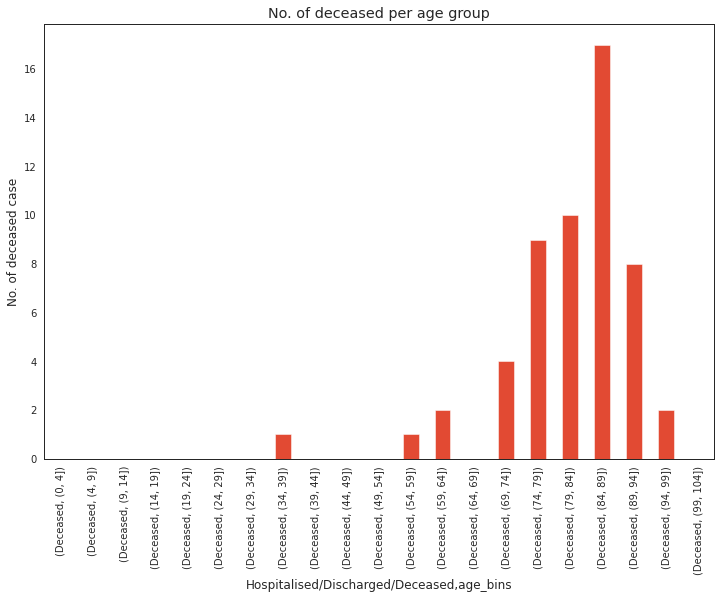

In [7]:
display(IPython.display.HTML('<h2> Total no. of deceased: ' + str(len(df_deceased)) +  '</h2>'))


ax=df_deceased.groupby(['Hospitalised/Discharged/Deceased','age_bins']).size().plot(title='No. of deceased per age group', kind='bar')
ax.set(ylabel='No. of deceased case')


In [8]:
#Ratio Breakdown
display(df_ratio)



Hospitalised/Discharged/Deceased,Deceased,Discharged,Hospitalised,No admission,Pending admission,To be provided
age_bins,,,,,,
"(0, 4]",0.000000,0.676471,0.279412,0.000000,0.000000,0.044118
"(4, 9]",0.000000,0.721519,0.265823,0.000000,0.000000,0.012658
"(9, 14]",0.000000,0.744681,0.223404,0.000000,0.000000,0.031915
"(14, 19]",0.000000,0.886364,0.086364,0.004545,0.004545,0.018182
"(19, 24]",0.000000,0.705882,0.254902,0.005602,0.014006,0.019608
"(24, 29]",0.000000,0.719298,0.228070,0.020468,0.014620,0.017544
"(29, 34]",0.000000,0.771523,0.185430,0.023179,0.006623,0.013245
"(34, 39]",0.002770,0.783934,0.191136,0.008310,0.011080,0.002770
"(39, 44]",0.000000,0.751656,0.218543,0.000000,0.016556,0.013245


Report date
2020-08-04    80
2020-08-05    85
2020-08-06    95
2020-08-07    89
2020-08-08    69
2020-08-09    72
2020-08-10    69
dtype: int64

[Text(0, 0.5, 'No. of infections')]

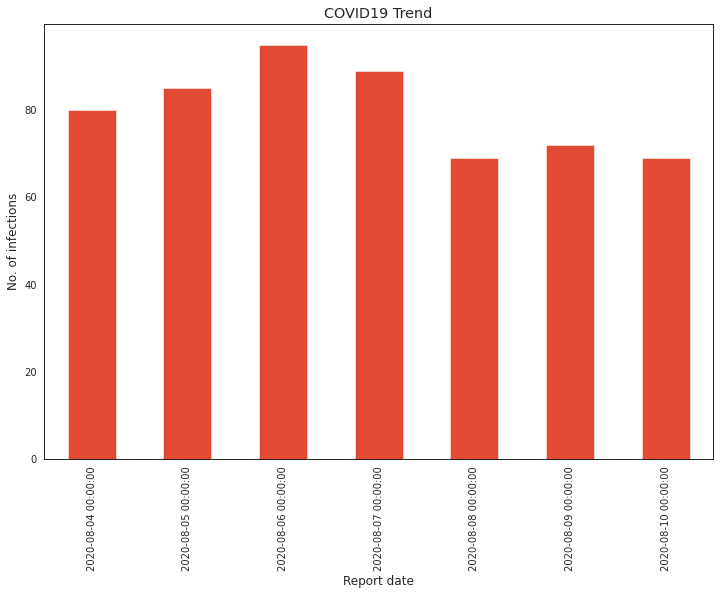

In [9]:
df_7days = df[df['Report date'] > datetime.datetime.now() - pd.to_timedelta("8day")]
df_7days_grouped = df_7days.groupby(['Report date']).size()

display(df_7days_grouped)

ax = df_7days_grouped.plot(title='COVID19 Trend', kind='bar')
ax.set(ylabel='No. of infections')

